In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%cd /Users/bobbyhessamian/Google Drive/MSC/Modules/Core/INM431 - Machine Learning/Coursework/Datasets/Bank marketing/My Coursework/Data

/Users/bobbyhessamian/Google Drive/MSC/Modules/Core/INM431 - Machine Learning/Coursework/Datasets/Bank marketing/My Coursework/Data


In [3]:
df = pd.read_csv("bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

<AxesSubplot:title={'center':'Education and deposit'}>

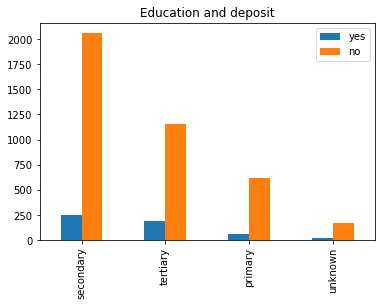

In [4]:
#education and deposit
#j_df = pd.DataFrame()

#j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
#j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

#j_df.plot.bar(title = 'Education and deposit')

In [4]:
#No missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


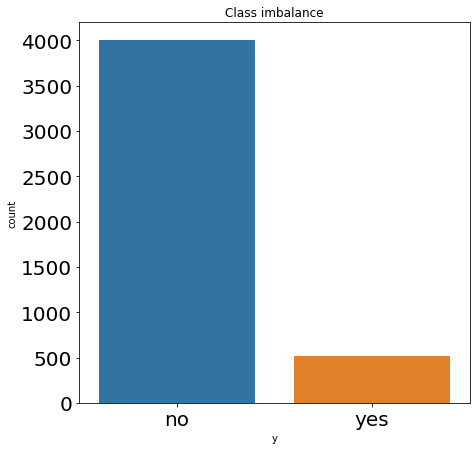

In [25]:
import seaborn as sns

plt.figure(figsize=[7,7])
sns.countplot(x='y',data=df)
plt.tick_params(labelsize=20)
plt.title('Class imbalance')
plt.savefig('class_imbalance.jpg')

In [26]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [ ]:
#for i, col in enumerate(df.columns):
#    plt.figure(i)
#    sns.barplot(x=df[col].index, y=df[col].values)
    

In [ ]:
plt.subplots_adjust(left=0.125, bottom=3.5, right=0.9, top=4.6, wspace=0.2, hspace=0.2)
plt.figure(figsize=(15,15))
plt.subplot(5,4,1)
#plt.hist(df.age)
sns.barplot(x=df.age.index, y=df.age.values)
plt.subplot(4,4,2)
plt.hist(df.job)
plt.xticks(rotation=45)
plt.subplot(4,4,3)
plt.hist(df.marital)
plt.subplot(4,4,4)
plt.xticks(rotation=45)
plt.hist(df.education)
plt.subplot(4,4,5)
plt.hist(df.default)
plt.subplot(4,4,6)
plt.hist(df.housing)
plt.subplot(4,4,7)
plt.hist(df.loan)
plt.subplot(4,4,8)
plt.hist(df.contact)
plt.subplot(4,4,9)
plt.hist(df.month)
plt.subplot(4,4,10)
plt.hist(df.day_of_week)
plt.subplot(4,4,11)
plt.hist(df.duration)
plt.subplot(4,4,12)
plt.hist(df.campaign)
plt.show()

In [ ]:
    features = names = list(df.columns)
for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,cols,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='green')
    ax.set_title(feature+" Distribution",color='red')

In [ ]:
numCols=df.shape[1]

fig, axisRows = plt.subplots(numCols//5+1, 5, figsize=(20, 20))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            df.hist(column = df.columns[i], bins = 10, ax=axis)
            i = i+1

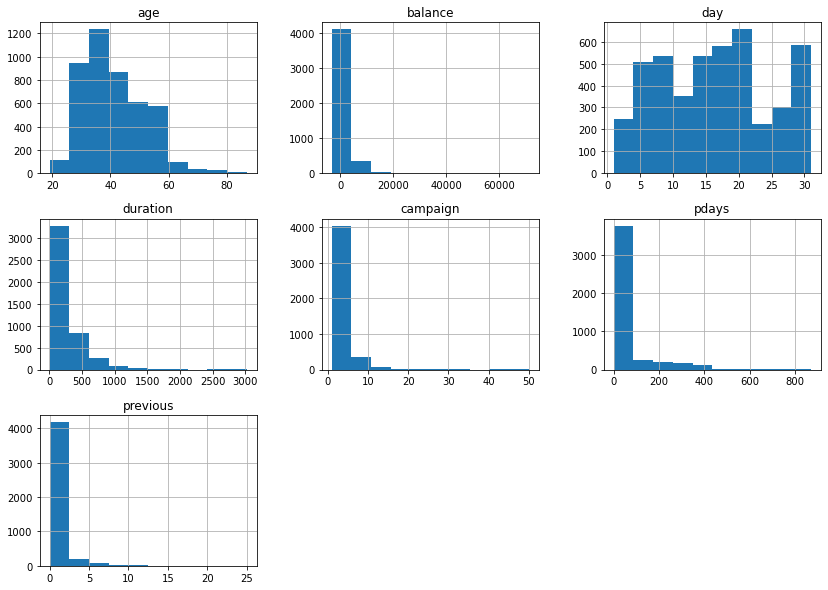

In [28]:
# Histogram of numerical variables
df.hist(bins=10, figsize=(14,10))
plt.show()

<AxesSubplot:>

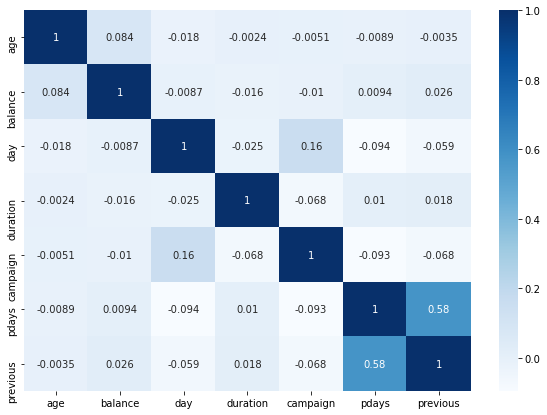

In [30]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(method='pearson'), cmap="Blues", annot=True)

<AxesSubplot:>

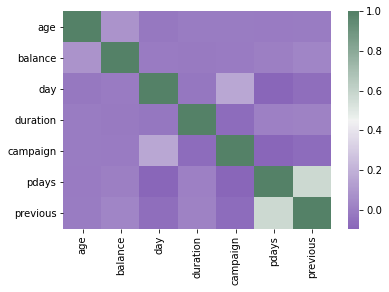

In [202]:
colorMap = sns.diverging_palette(145, 280, s=50, l=50, n=200)
sns.heatmap(df.corr(), cmap = colorMap[::-1])  

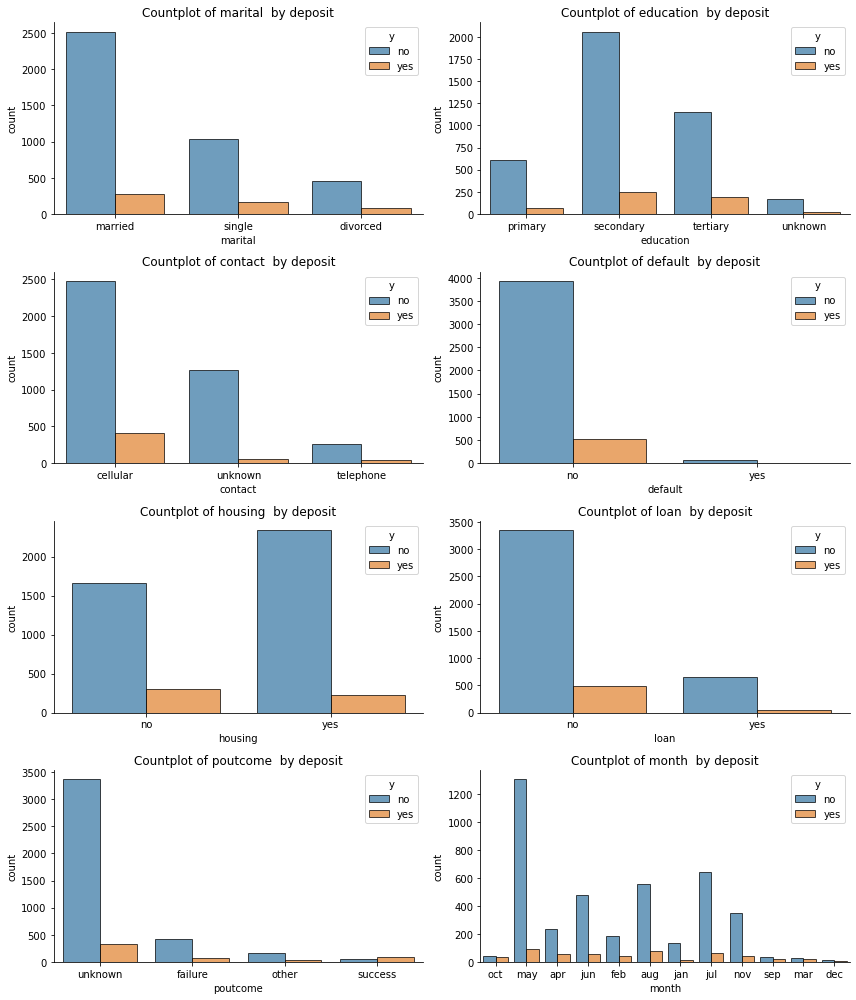

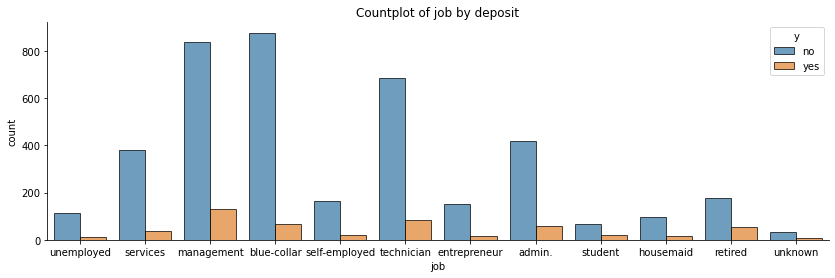

In [203]:
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='y',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

In [8]:
#catagoricalVariables = {'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'};

#for i in catgeoricalVriables:
#    catgeoricalVriables.value() = pd.get_dummies(categoricalVariable)
    
job_ = pd.get_dummies(df['job'],drop_first=True, prefix='job_')
marital_ = pd.get_dummies(df['marital'],drop_first=True, prefix='marital_')
education_ = pd.get_dummies(df['education'],drop_first=True, prefix='education_')
default_ = pd.get_dummies(df['default'],drop_first=True, prefix='default_')
housing_ = pd.get_dummies(df['housing'],drop_first=True, prefix='housing_')
loan_ = pd.get_dummies(df['loan'],drop_first=True, prefix='loan_')
contact_ = pd.get_dummies(df['contact'],drop_first=True, prefix='contact_')
month_ = pd.get_dummies(df['month'],drop_first=True, prefix='month_')
poutcome_ = pd.get_dummies(df['poutcome'],drop_first=True, prefix='poutcome_')

## Since we added the dummy variables, we drop the originals
df.drop(['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'],axis=1,inplace=True)

#add these to our dataframe
df_dmy = pd.concat([df,job_, marital_, education_, default_, housing_, loan_, contact_, month_, poutcome_],axis=1)

# Move the dependent variable column to the beging of the data frame
y = df_dmy['y']
df_dmy.drop(labels=['y'], axis=1,inplace = True)
df_dmy.insert(0, 'y', y)

#replace yes/no with 1/0 for out dependent variable
df_dmy['y'] = df_dmy['y'].map({'yes': 1, 'no': 0})
df_dmy['y'].head()

df_dmy.head()

,y,age,balance,day,duration,campaign,pdays,previous,job__blue-collar,job__entrepreneur,...,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,poutcome__other,poutcome__success,poutcome__unknown
0,0,30,1787,19,79,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,33,4789,11,220,1,339,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,35,1350,16,185,1,330,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,30,1476,3,199,4,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,59,0,5,226,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


df_dmy.head()

X = df_dmy.iloc[:, df_dmy.columns != 'y']
y = df_dmy.iloc[:, df_dmy.columns == 'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [224]:
#X_train.to_csv("X_train_bank.csv")
#X_test.to_csv("X_test_bank.csv")
#y_train.to_csv("y_train_bank.csv")
#y_test.to_csv("y_test_bank.csv")
#df_dmy.to_csv("data_bank.csv")

<AxesSubplot:>

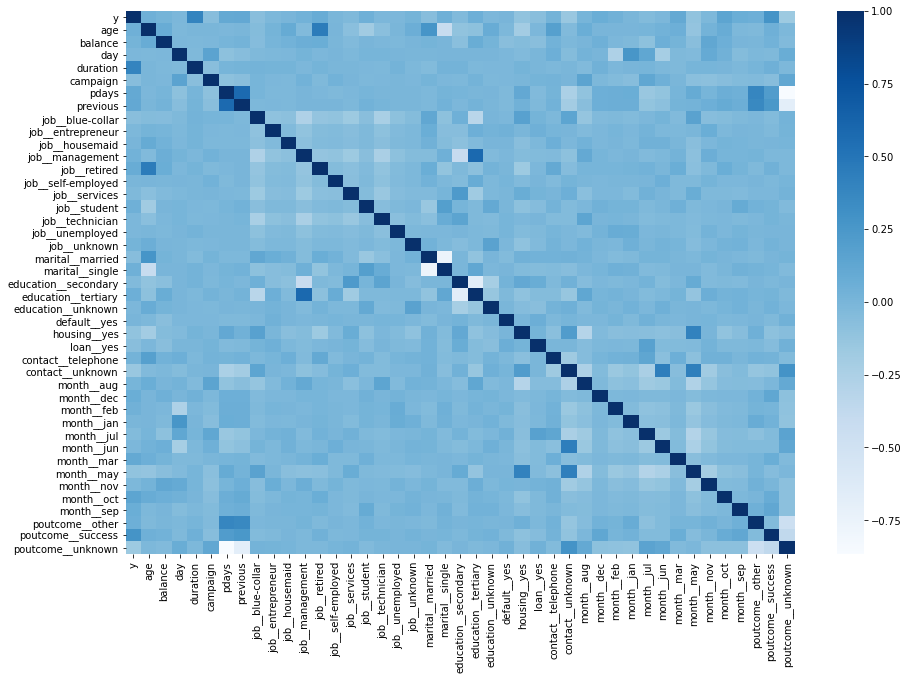

In [13]:
plt.figure(figsize=[15,10])
sns.heatmap(df_dmy.corr(method='pearson'), cmap="Blues")

In [11]:
#replace 1/0 with yes/no for our dependent variable
df_dmy['y'] = df_dmy['y'].map({1:'yes', 0: 'no'})
df_dmy['y'].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [12]:
#df_dmy.to_csv("data_bank_yes_no.csv")

NameError: name 'df_my' is not defined